In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#IMPORTING DATASET
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs') 
df=dataset['train'].to_pandas()

#CLEANING THE DATA
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
def clean_strings(string_list):
    if pd.notna(string_list):
        return ast.literal_eval(string_list)
    else:
        return string_list
df['job_skills']=df['job_skills'].apply(clean_strings)

In [4]:
df=df[df['job_title_short']== 'Data Analyst']

In [26]:
df_exploded=df.explode('job_skills')
skill_stats=df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),  #here we define the column name which we want with the agg function
    median_salary=('salary_year_avg', 'median')    
)
skill_stats=skill_stats.sort_values('skill_count', ascending=False).head(20)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


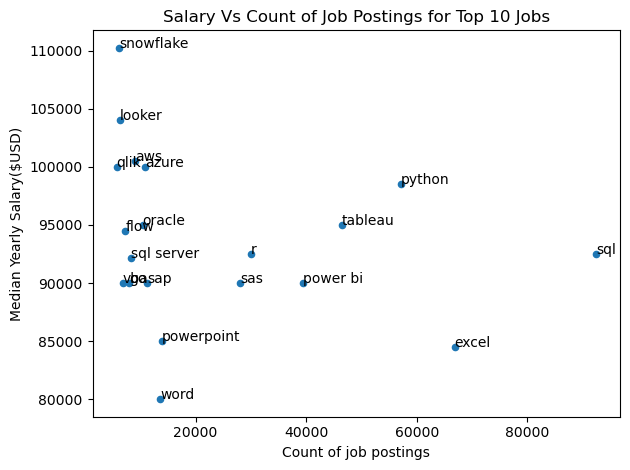

In [27]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of job postings')
plt.ylabel('Median Yearly Salary($USD)')
plt.title('Salary Vs Count of Job Postings for Top 10 Jobs')
plt.tight_layout()

for i,title in enumerate(skill_stats.index):
    #print(i,title)
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],title)

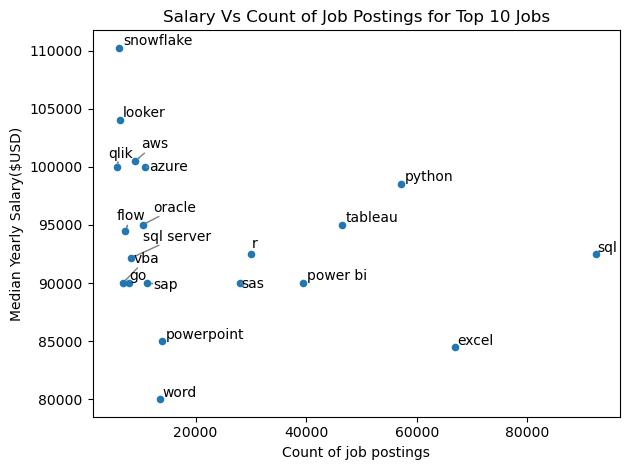

In [34]:
from adjustText import adjust_text
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts=[]
for i,title in enumerate(skill_stats.index):
    #print(i,title)
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],title))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

plt.xlabel('Count of job postings')
plt.ylabel('Median Yearly Salary($USD)')
plt.title('Salary Vs Count of Job Postings for Top 10 Jobs')
plt.tight_layout()
plt.show()


